## Transfer Learning VGG19 using Keras

Dataset can be found in the following url - https://data.mendeley.com/datasets/tywbtsjrjv/1

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [256,256]

vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [256,256]

train_path = '/content/gdrive/MyDrive/ColabNotebooks/Pictures/potato_dataset_new/train'
valid_path = '/content/gdrive/MyDrive/ColabNotebooks/Pictures/potato_dataset_new/val'
test_path = '/content/gdrive/MyDrive/ColabNotebooks/Pictures/potato_dataset_new/test'


In [ ]:
# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/gdrive/MyDrive/ColabNotebooks/Pictures/potato_dataset_new/train/*')

In [ ]:
len(folders)

3

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg19.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

valid_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (256,256),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2100 images belonging to 3 classes.


In [ ]:
from sklearn.utils import shuffle
valid_set = valid_datagen.flow_from_directory(valid_path,
                                            target_size = (256,256),
                                            batch_size = 32,
                                            class_mode = 'categorical',)

Found 300 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                                 target_size = (256,256),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                            shuffle=False)

Found 600 images belonging to 3 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=valid_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(valid_set)
)

<ipython-input-17-e63160ae6cfd>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
66/66 [==============================] - 432s 6s/step - loss: 1.0272 - accuracy: 0.7552 - val_loss: 0.5502 - val_accuracy: 0.7900
Epoch 2/20
66/66 [==============================] - 40s 603ms/step - loss: 0.1617 - accuracy: 0.9419 - val_loss: 0.1288 - val_accuracy: 0.9600
Epoch 3/20
66/66 [==============================] - 39s 594ms/step - loss: 0.1259 - accuracy: 0.9562 - val_loss: 0.1241 - val_accuracy: 0.9600
Epoch 4/20
66/66 [==============================] - 40s 604ms/step - loss: 0.1091 - accuracy: 0.9638 - val_loss: 0.1607 - val_accuracy: 0.9467
Epoch 5/20
66/66 [==============================] - 39s 593ms/step - loss: 0.1060 - accuracy: 0.9581 - val_loss: 0.1335 - val_accuracy: 0.9333
Epoch 6/20
66/66 [==============================] - 39s 587ms/step - loss: 0.0819 - accuracy: 0.9700 - val_loss: 0.1250 - val_accuracy: 0.9467
Epoch 7/20
66/66 [==============================] - 39s 590ms/step - loss: 0.0587 - accuracy: 0.9795 - val_loss: 0.0786 - val_accuracy: 0.9767
E

In [ ]:
import matplotlib.pyplot as plt

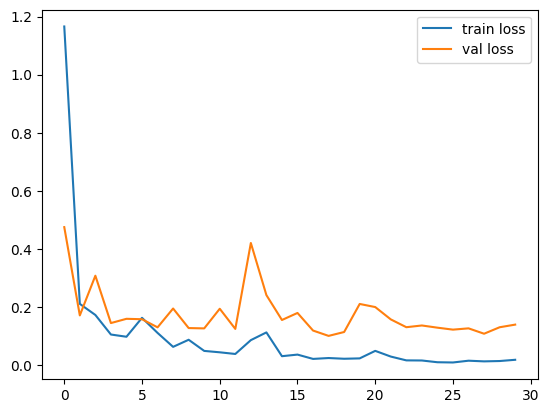

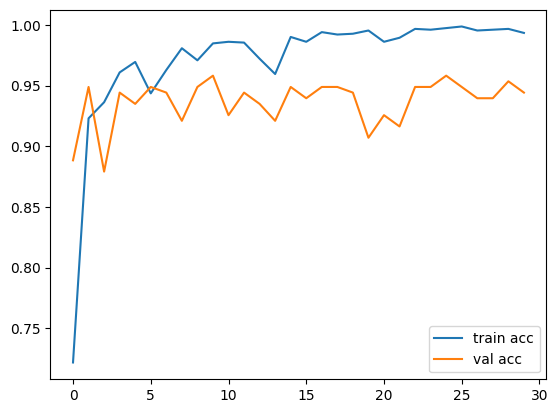

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss_vgg19')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc_vgg19')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('vgg19_model_potato_disease.h5')
model.save('/content/gdrive/MyDrive/ColabNotebooks/vgg19_model_potato_disease.h5')

In [ ]:

y_pred = model.predict(test_set)


19/19 [==============================] - 4s 228ms/step


In [ ]:
scores=model.evaluate(test_set)

19/19 [==============================] - 4s 204ms/step - loss: 0.1001 - accuracy: 0.9600


In [ ]:
scores

[0.10014045983552933, 0.9599999785423279]

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
class_names = list(training_set.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
import tensorflow as tf
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [ ]:
def returnIndex(labels):
  for i in range(len(labels)):
      if(labels[i]==1):
        return i

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_set:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[returnIndex(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

Output hidden; open in https://colab.research.google.com to view.

<ipython-input-51-61a44d95994f>:34: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_set)


Confusion Matrix
Normalized confusion matrix
Classification Report
                       precision    recall  f1-score   support

Potato___Early_blight       0.93      1.00      0.96       200
 Potato___Late_blight       0.99      0.90      0.94       200
     Potato___healthy       0.97      0.98      0.98       200

             accuracy                           0.96       600
            macro avg       0.96      0.96      0.96       600
         weighted avg       0.96      0.96      0.96       600



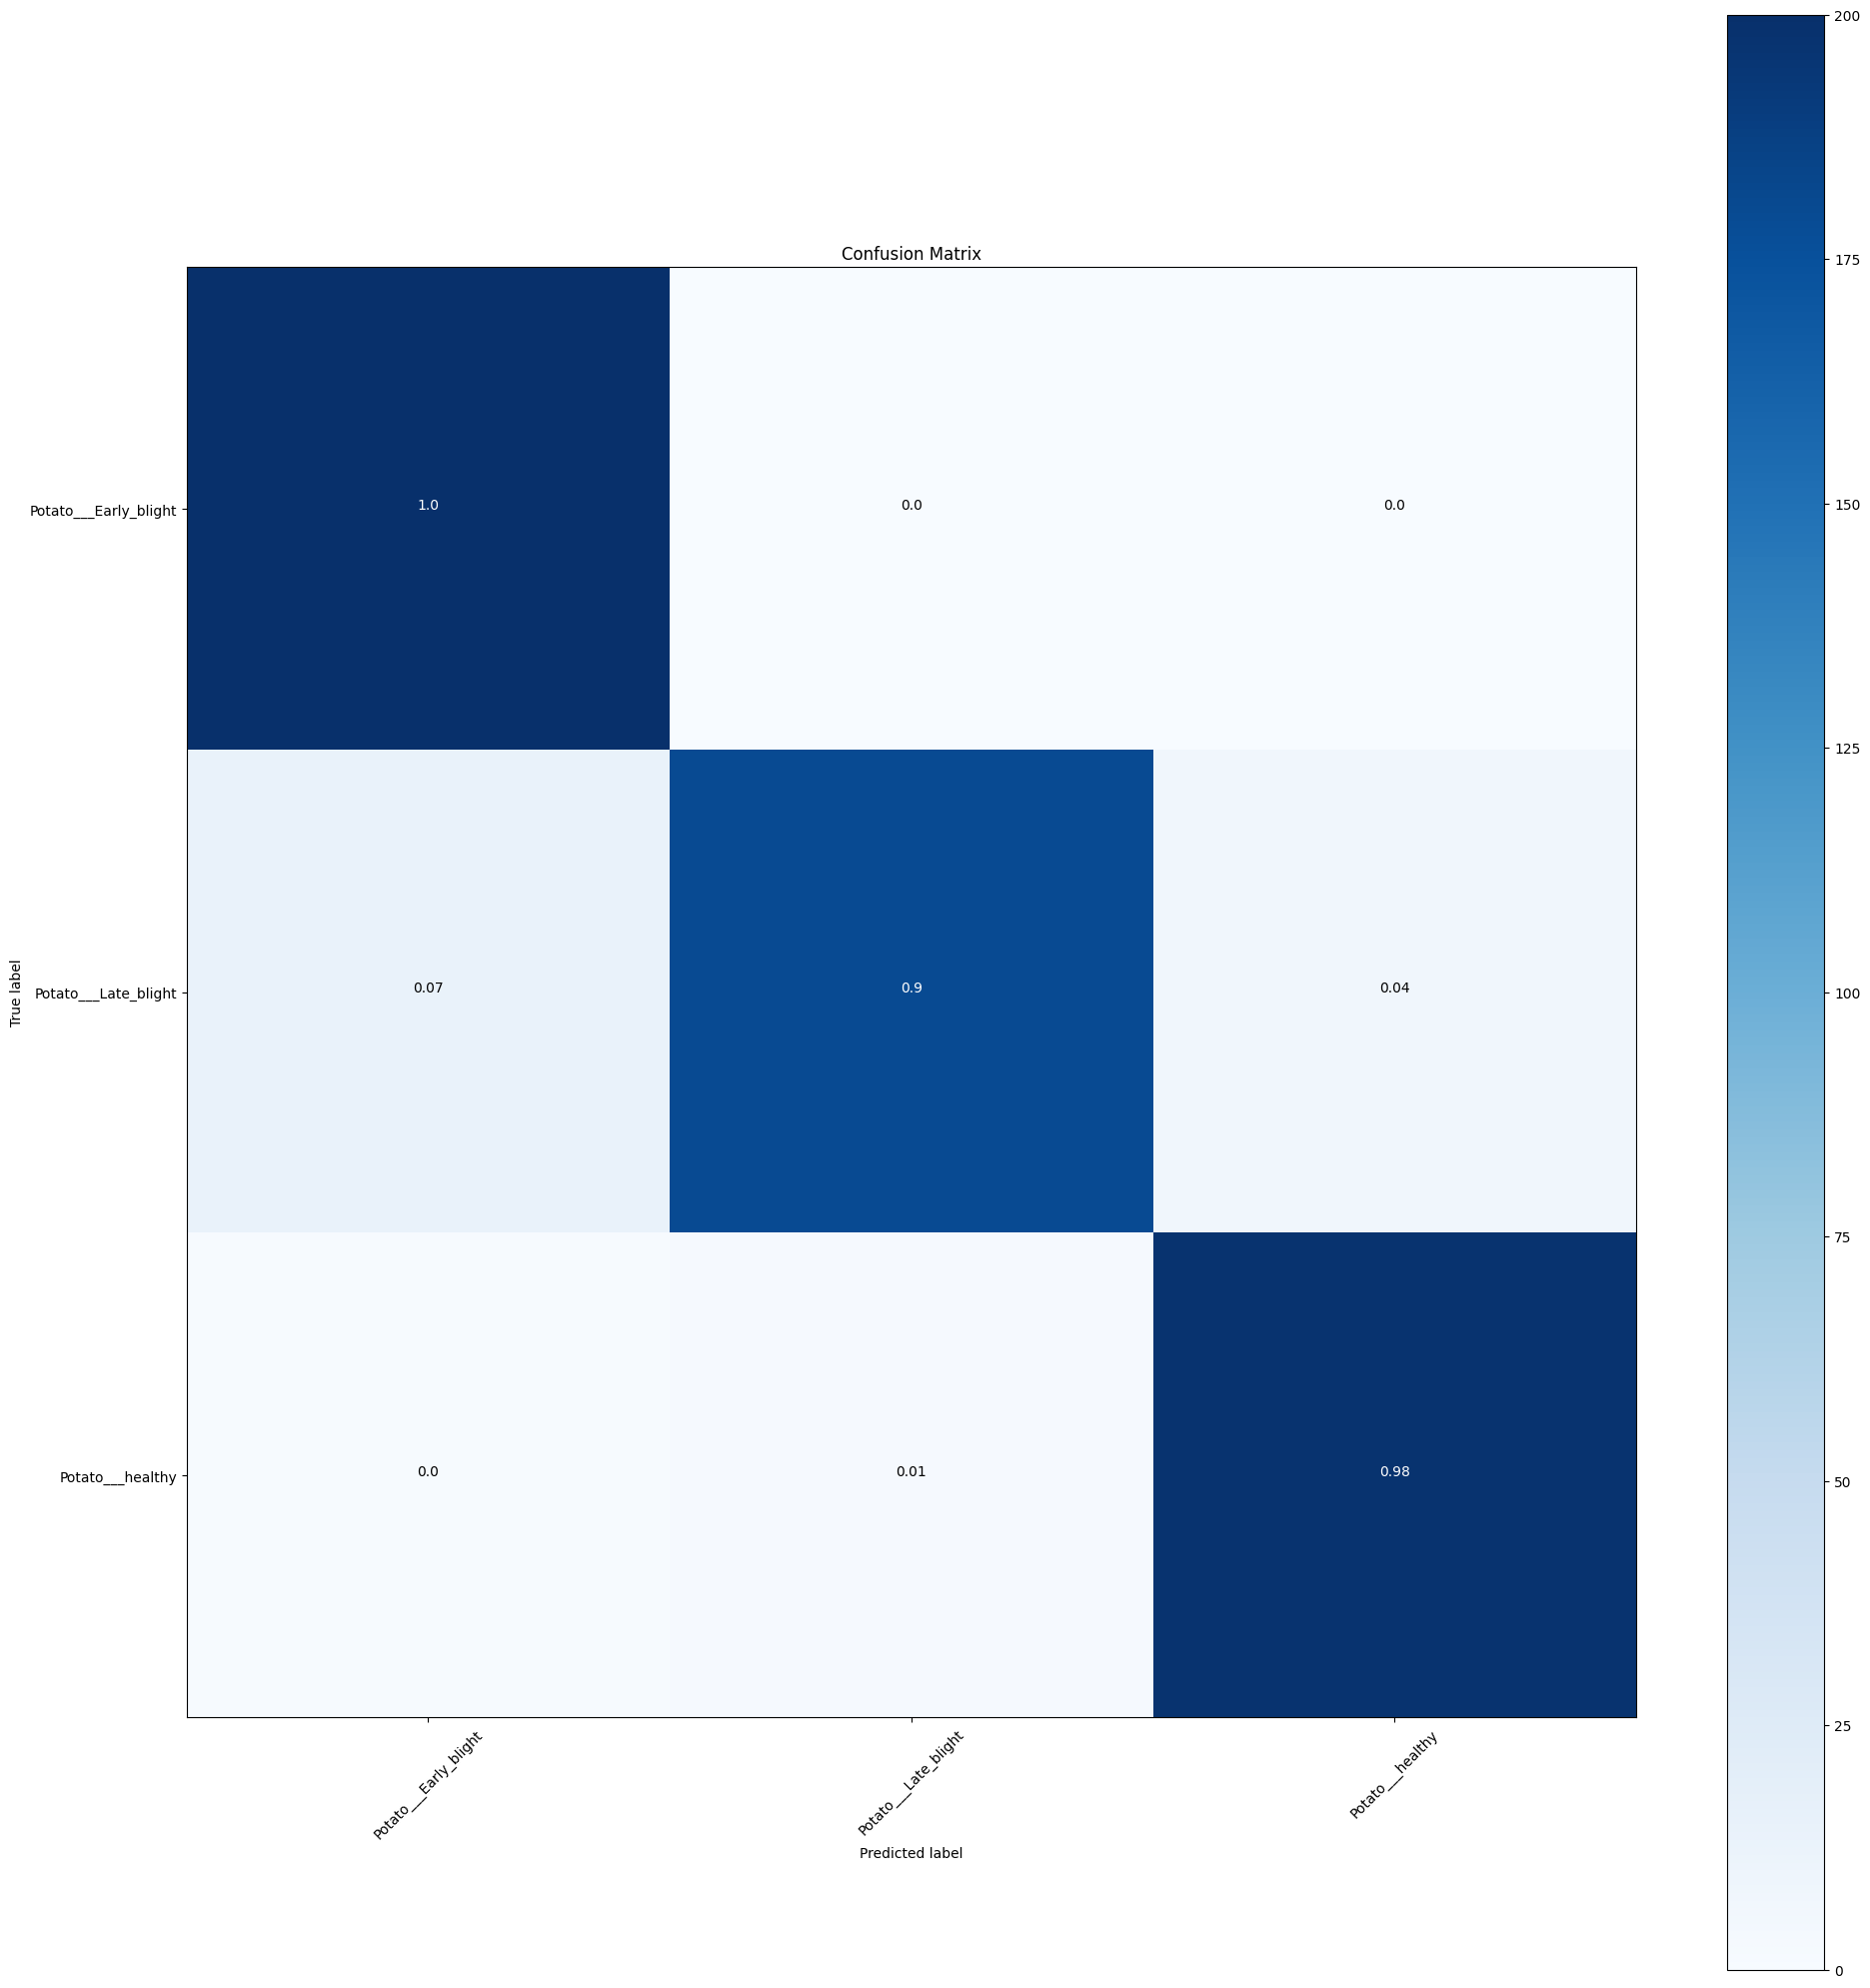

In [ ]:
#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(20,20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#Print the Target names
from sklearn.metrics import classification_report, confusion_matrix
import itertools 
#shuffle=False
target_names = []
for key in training_set.class_indices:
    target_names.append(key)
# print(target_names)
#Confusion Matrix
Y_pred = model.predict_generator(test_set)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_set.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')
#Print Classification Report
print('Classification Report')
print(classification_report(test_set.classes, y_pred, target_names=target_names))

In [ ]:
y_true=test_set.classes

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np
#get classification report
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       200
           1       0.99      0.90      0.94       200
           2       0.97      0.98      0.98       200

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600



In [ ]:
#get confusion matrix
print(confusion_matrix(y_true,y_pred))

[[200   0   0]
 [ 14 179   7]
 [  1   2 197]]
